# **1. Perkenalan Dataset**


# Perkenalan Dataset

## Nama Dataset
BBC Articles Dataset

## Sumber
[Kaggle - Jacopo Ferretti](https://www.kaggle.com/datasets/jacopoferretti/bbc-articles-dataset)

## Deskripsi
Dataset ini berisi artikel berita dari BBC News beserta kategori topiknya. Dataset cocok untuk tugas seperti klasifikasi teks, analisis konten berita, dan text summarization.

## Kategori
- Business
- Entertainment
- Politics
- Sport
- Tech

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
#Type your code here
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import re


nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Rama
[nltk_data]     Dev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
dataset_path = kagglehub.dataset_download(
    "jacopoferretti/bbc-articles-dataset"
)

print("Dataset di donwload :", dataset_path)

Dataset di donwload : C:\Users\Rama Dev\.cache\kagglehub\datasets\jacopoferretti\bbc-articles-dataset\versions\13


In [4]:
TARGET_DIR = "../bbc_news_raw"
TARGET_FILE = "bbc_news.csv"
os.makedirs(TARGET_DIR, exist_ok=True)

In [5]:
source_file = None

In [6]:
for file in os.listdir(dataset_path):
    if file.lower().endswith(".csv") and "bbc" in file.lower():
        source_file = os.path.join(dataset_path, file)
        break

if source_file is None:
    raise FileNotFoundError("Dataset BBC (.csv) tidak ditemukan")

In [7]:
df = pd.read_csv(
    source_file,
    sep=",",
    engine="python"
)

csv_path = os.path.join(TARGET_DIR, TARGET_FILE)
df.to_csv(csv_path, index=False)

print("Dataset di simpan :", csv_path)

Dataset di simpan : ../bbc_news_raw\bbc_news.csv


In [8]:
df = pd.read_csv("../bbc_news_raw/bbc_news.csv")
df.head()
df.shape

(2127, 7)

In [9]:
output_path = os.path.join(TARGET_DIR, TARGET_FILE)
df.to_csv(output_path, index=False)

print("Dataset berhasil di tampilkan di workspace:", output_path)

Dataset berhasil di tampilkan di workspace: ../bbc_news_raw\bbc_news.csv


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**Struktur Dataset**

In [10]:
#Type your code here
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   text                          2127 non-null   object 
 1   labels                        2127 non-null   object 
 2   no_sentences                  2127 non-null   int64  
 3   Flesch Reading Ease Score     2127 non-null   float64
 4   Dale-Chall Readability Score  2127 non-null   float64
 5   text_rank_summary             2127 non-null   object 
 6   lsa_summary                   2127 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 116.4+ KB


text                            0
labels                          0
no_sentences                    0
Flesch Reading Ease Score       0
Dale-Chall Readability Score    0
text_rank_summary               0
lsa_summary                     0
dtype: int64

In [11]:
df.head()
df.columns

Index(['text', 'labels', 'no_sentences', 'Flesch Reading Ease Score',
       'Dale-Chall Readability Score', 'text_rank_summary', 'lsa_summary'],
      dtype='object')

In [12]:
df.head(3)

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...


**Distribusi Label Dataset**

In [13]:
df["labels"].value_counts()

labels
sport            505
business         503
politics         403
entertainment    369
tech             347
Name: count, dtype: int64

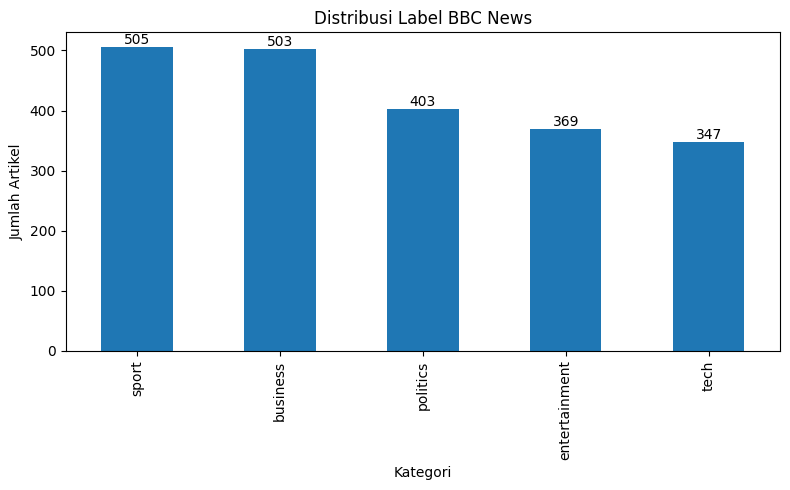

In [14]:
ax = df["labels"].value_counts().plot(
    kind="bar",
    figsize=(8, 5)
)

plt.title("Distribusi Label BBC News")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Artikel")

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()


**Panjang dari Text di dalam dataset**

In [15]:
df["text_length"] = df["text"].str.len()
df["text_length"].describe()


count     2127.000000
mean      2263.977903
std       1381.679684
min        502.000000
25%       1439.500000
50%       1958.000000
75%       2802.000000
max      25484.000000
Name: text_length, dtype: float64

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
df.isnull().sum()

text                            0
labels                          0
no_sentences                    0
Flesch Reading Ease Score       0
Dale-Chall Readability Score    0
text_rank_summary               0
lsa_summary                     0
text_length                     0
dtype: int64

In [17]:
df = df.dropna()
df.isnull().sum()

text                            0
labels                          0
no_sentences                    0
Flesch Reading Ease Score       0
Dale-Chall Readability Score    0
text_rank_summary               0
lsa_summary                     0
text_length                     0
dtype: int64

In [18]:
df = df.drop_duplicates()
df.shape

(2127, 8)

**Normalisasi Teks**

In [19]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\n+", " ", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)
df["clean_text"].head()


0    ad sales boost time warner profit quarterly pr...
1    dollar gains on greenspan speech the dollar ha...
2    yukos unit buyer faces loan claim the owners o...
3    high fuel prices hit bas profits british airwa...
4    pernod takeover talk lifts domecq shares in uk...
Name: clean_text, dtype: object

In [20]:
df.columns = (
    df.columns
      .str.lower()
      .str.strip()
      .str.replace(" ", "_")
)

In [21]:
df["text_length"].describe()

count     2127.000000
mean      2263.977903
std       1381.679684
min        502.000000
25%       1439.500000
50%       1958.000000
75%       2802.000000
max      25484.000000
Name: text_length, dtype: float64

In [22]:
encoder = LabelEncoder()
df["label_encoded"] = encoder.fit_transform(df["labels"])
df.head(2)


,text,labels,no_sentences,flesch_reading_ease_score,dale-chall_readability_score,text_rank_summary,lsa_summary,text_length,clean_text,label_encoded
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...,2558,ad sales boost time warner profit quarterly pr...,0
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san...",2251,dollar gains on greenspan speech the dollar ha...,0


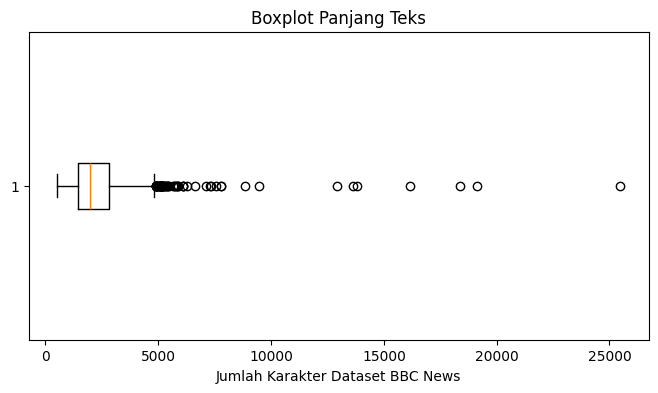

In [23]:
df["text_length_bin"] = pd.cut(
    df["text_length"],
    bins=[0, 1000, 3000, 10000, df["text_length"].max()],
    labels=["short", "medium", "long", "very_long"]
)
df["text_length_bin"].value_counts()
plt.figure(figsize=(8, 4))
plt.boxplot(df["text_length"], vert=False)
plt.title("Boxplot Panjang Teks")
plt.xlabel("Jumlah Karakter Dataset BBC News")
plt.show()

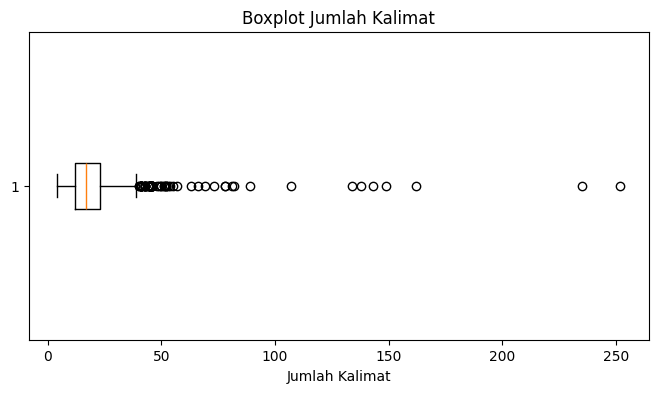

In [24]:
plt.figure(figsize=(8, 4))
plt.boxplot(df["no_sentences"], vert=False)
plt.title("Boxplot Jumlah Kalimat")
plt.xlabel("Jumlah Kalimat")
plt.show()

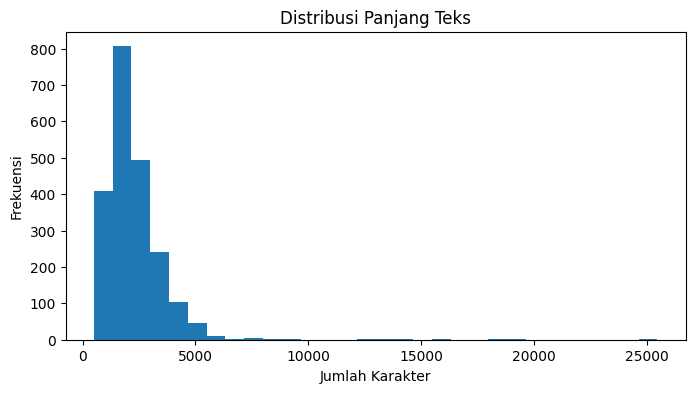

In [25]:
plt.figure(figsize=(8, 4))
plt.hist(df["text_length"], bins=30)
plt.title("Distribusi Panjang Teks")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Frekuensi")
plt.show()


**Menghitung Batas Outlier**

In [26]:
Q1 = df["text_length"].quantile(0.25)
Q3 = df["text_length"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: -604.25
Upper bound: 4845.75


**Menghitung Jumlah Outlier yang ada**

In [27]:
outliers = df[
    (df["text_length"] < lower_bound) |
    (df["text_length"] > upper_bound)
]

print("Jumlah outlier:", outliers.shape[0])
outliers.head()

Jumlah outlier: 61


,text,labels,no_sentences,flesch_reading_ease_score,dale-chall_readability_score,text_rank_summary,lsa_summary,text_length,clean_text,label_encoded,text_length_bin
145,Why few targets are better than many\n\nThe ec...,business,46,61.06,8.13,The economic targets set out at the Lisbon sum...,For many economists and analysts they are abou...,5153,why few targets are better than many the econo...,0,long
241,Making your office work for you\n\nOur mission...,business,42,58.62,8.61,"And if you want to take part in the series, go...","Over the next few months, our panel of experts...",5140,making your office work for you our mission to...,0,long
243,The 'ticking budget' facing the US\n\nThe budg...,business,48,62.88,9.00,"From the standpoint of the big fiscal trends, ...","Indeed, if Congress were rash enough to balanc...",4943,the ticking budget facing the us the budget pr...,0,long
274,Turkey turns on the economic charm\n\nThree ye...,business,43,51.48,9.40,Critics insist that much of the optimism about...,Turkey could also help alleviate a labour shor...,5205,turkey turns on the economic charm three years...,0,long
284,Japan's ageing workforce: built to last\n\nIn ...,business,45,60.35,9.31,"""In the year 2050, if the birth rate remains t...",But while life may be a game of golf for Mr Sh...,5356,japans ageing workforce built to last in his t...,0,long


In [29]:
lower_bound = df["text_length"].quantile(0.05)
upper_bound = df["text_length"].quantile(0.95)

df_clean = df[
    (df["text_length"] >= lower_bound) &
    (df["text_length"] <= upper_bound)
].copy()

print("Jumlah data setelah menghapus outlier:", df_clean.shape[0])

Jumlah data setelah menghapus outlier: 1913


In [33]:
df_clean.to_csv("bbc_news_preprocessing.csv", index=False)
print("Dataset hasil preprocessing tersimpan di preprocessing/bbc_news_preprocessing.csv")

Dataset hasil preprocessing tersimpan di preprocessing/bbc_news_preprocessing.csv
